# CS253 Assignment 3
Name: Amit Kumar Singh

Roll no: 190117

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Step to run:
Upload **kag_risk_factors_cervical_cancer.csv** to the notebook and run the cells

In [111]:
risk_factor_df = pd.read_csv("/content/kag_risk_factors_cervical_cancer.csv")
risk_factor_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [112]:
risk_factor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

# DATA PREPROCESSING

In [113]:
risk_factor_df = risk_factor_df.replace('?', np.nan)
risk_factor_df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [114]:
df = risk_factor_df
df = df._convert(numeric=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

# Replacing NaN values with median for continuous variable and with 1 for binary variables.

In [115]:
df['Number of sexual partners'] = df['Number of sexual partners'].fillna(df['Number of sexual partners'].median())
df['First sexual intercourse'] = df['First sexual intercourse'].fillna(df['First sexual intercourse'].median())
df['Num of pregnancies'] = df['Num of pregnancies'].fillna(df['Num of pregnancies'].median())
df['Smokes (years)'] = df['Smokes (years)'].fillna(df['Smokes (years)'].median())
df['Smokes (packs/year)'] = df['Smokes (packs/year)'].fillna(df['Smokes (packs/year)'].median())
df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].fillna(df['Hormonal Contraceptives (years)'].median())
df['STDs (number)'] = df['STDs (number)'].fillna(df['STDs (number)'].median())
df['STDs:condylomatosis'] = df['STDs:condylomatosis'].fillna(df['STDs:condylomatosis'].median())
df['STDs:cervical condylomatosis'] = df['STDs:cervical condylomatosis'].fillna(df['STDs:cervical condylomatosis'].median())
df['STDs:vaginal condylomatosis'] = df['STDs:vaginal condylomatosis'].fillna(df['STDs:vaginal condylomatosis'].median())
df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].fillna(df['STDs:vulvo-perineal condylomatosis'].median())
df['STDs:syphilis'] = df['STDs:syphilis'].fillna(df['STDs:syphilis'].median())
df['STDs:pelvic inflammatory disease'] = df['STDs:pelvic inflammatory disease'].fillna(df['STDs:pelvic inflammatory disease'].median())
df['STDs:genital herpes'] = df['STDs:genital herpes'].fillna(df['STDs:genital herpes'].median())
df['STDs:molluscum contagiosum'] = df['STDs:molluscum contagiosum'].fillna(df['STDs:molluscum contagiosum'].median())
df['STDs:AIDS'] = df['STDs:AIDS'].fillna(df['STDs:AIDS'].median())
df['STDs:HIV'] = df['STDs:HIV'].fillna(df['STDs:HIV'].median())
df['STDs:Hepatitis B'] = df['STDs:Hepatitis B'].fillna(df['STDs:Hepatitis B'].median())
df['STDs:HPV'] = df['STDs:HPV'].fillna(df['STDs:HPV'].median())
df['STDs: Time since first diagnosis'] = df['STDs: Time since first diagnosis'].fillna(df['STDs: Time since first diagnosis'].median())
df['STDs: Time since last diagnosis'] = df['STDs: Time since last diagnosis'].fillna(df['STDs: Time since last diagnosis'].median())

In [116]:
df['Smokes'] = df['Smokes'].fillna(1)
df['Hormonal Contraceptives'] = df['Hormonal Contraceptives'].fillna(1)
df['IUD'] = df['IUD'].fillna(1) 
df['IUD (years)'] = df['IUD (years)'].fillna(1)
df['STDs'] = df['STDs'].fillna(1)

In [117]:
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [118]:
pd.set_option('display.max_columns', None)
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.0,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.0,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,0.158508,1.201241,0.446278,0.686480,2.035331,0.233100,0.580967,0.214452,0.155012,0.051282,0.0,0.004662,0.050117,0.020979,0.001166,0.001166,0.001166,0.0,0.020979,0.001166,0.002331,0.087413,4.177156,3.233100,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.644759,2.791883,1.400981,0.365430,4.060623,2.210351,0.464194,3.567040,0.423052,1.813256,0.410681,0.529617,0.220701,0.0,0.068159,0.218313,0.143398,0.034139,0.034139,0.034139,0.0,0.143398,0.034139,0.048252,0.302545,1.785156,1.818927,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Box plots before and after removing outliers:

Age                                   Axes(0.125,0.712609;0.168478x0.167391)
Number of sexual partners          Axes(0.327174,0.712609;0.168478x0.167391)
First sexual intercourse           Axes(0.529348,0.712609;0.168478x0.167391)
Num of pregnancies                 Axes(0.731522,0.712609;0.168478x0.167391)
Hormonal Contraceptives (years)       Axes(0.125,0.511739;0.168478x0.167391)
dtype: object

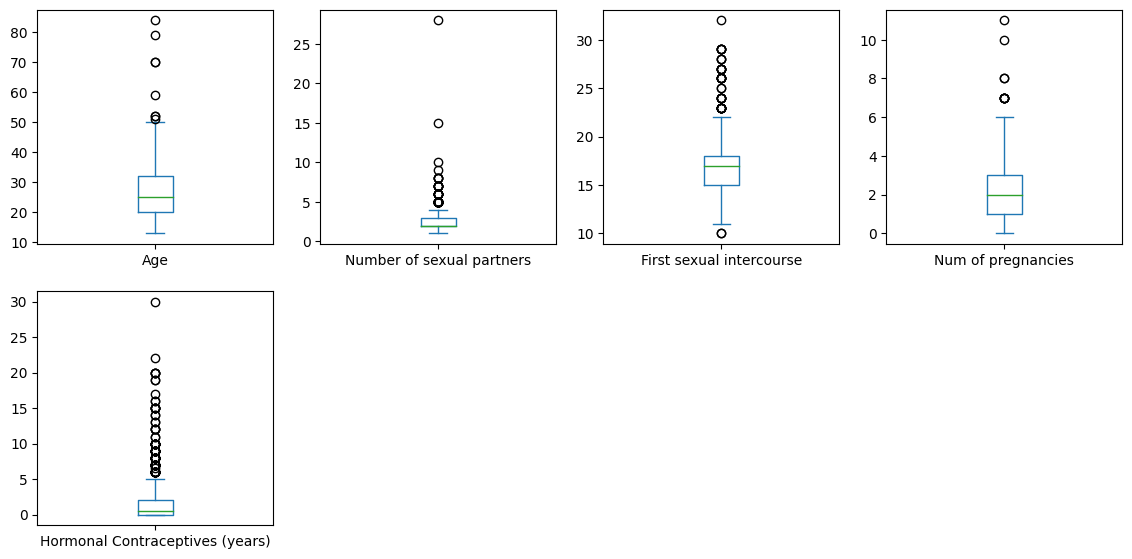

In [119]:
numerical=['Age','Number of sexual partners','First sexual intercourse','Num of pregnancies','Hormonal Contraceptives (years)']
df[numerical].plot(kind='box',subplots=True, layout=(4,4), figsize=(14,14))

<ipython-input-120-beb09ac5fd39>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_outliers[i][df_without_outliers[i]>max[i]]=max[i]
<ipython-input-120-beb09ac5fd39>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_outliers[i][df_without_outliers[i]<min[i]]=min[i]


Age                                   Axes(0.125,0.712609;0.168478x0.167391)
Number of sexual partners          Axes(0.327174,0.712609;0.168478x0.167391)
First sexual intercourse           Axes(0.529348,0.712609;0.168478x0.167391)
Num of pregnancies                 Axes(0.731522,0.712609;0.168478x0.167391)
Hormonal Contraceptives (years)       Axes(0.125,0.511739;0.168478x0.167391)
dtype: object

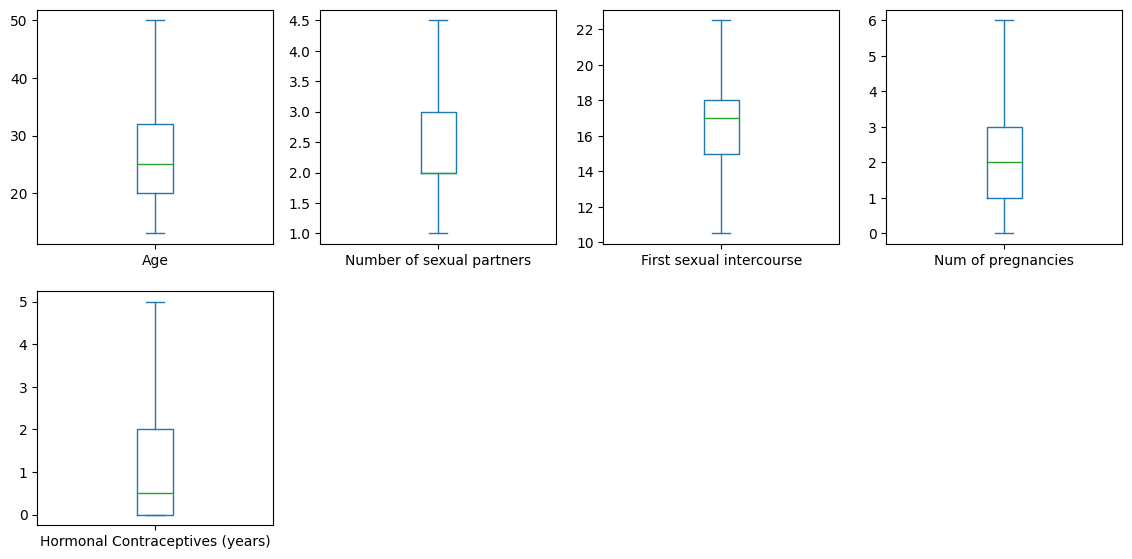

In [120]:
IQR=df[numerical].describe().T['75%']-df[numerical].describe().T['25%']

min,max=[df[numerical].describe().T['25%']-(IQR*1.5),df[numerical].describe().T['75%']+(IQR*1.5)]

df_without_outliers = df.copy()

for i in numerical:
    df_without_outliers[i][df_without_outliers[i]>max[i]]=max[i]
    df_without_outliers[i][df_without_outliers[i]<min[i]]=min[i]

df_without_outliers[numerical].plot(kind='box',subplots=True, layout=(4,4), figsize=(14,14))

# Normalizing Data

In [121]:
df_normalized = (df_without_outliers - df_without_outliers.min()) / (df_without_outliers.max() - df_without_outliers.min() )
df_normalized.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,0.0,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,0.0,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,0.369842,0.394938,0.528895,0.372572,0.158508,0.032466,0.012062,0.686480,0.285271,0.233100,0.030577,0.214452,0.038753,0.051282,NaN,0.004662,0.050117,0.020979,0.001166,0.001166,0.001166,NaN,0.020979,0.001166,0.002331,0.029138,0.151293,0.106338,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,0.213665,0.312560,0.193174,0.219351,0.365430,0.109747,0.059739,0.464194,0.374119,0.423052,0.095435,0.410681,0.132404,0.220701,NaN,0.068159,0.218313,0.143398,0.034139,0.034139,0.034139,NaN,0.143398,0.034139,0.048252,0.100848,0.085007,0.086616,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.189189,0.285714,0.375000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.142857,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.324324,0.285714,0.541667,0.333333,0.000000,0.000000,0.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.142857,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.513514,0.571429,0.625000,0.500000,0.000000,0.000000,0.000000,1.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.142857,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Correlation Heatmap:
Darker features are more correlated

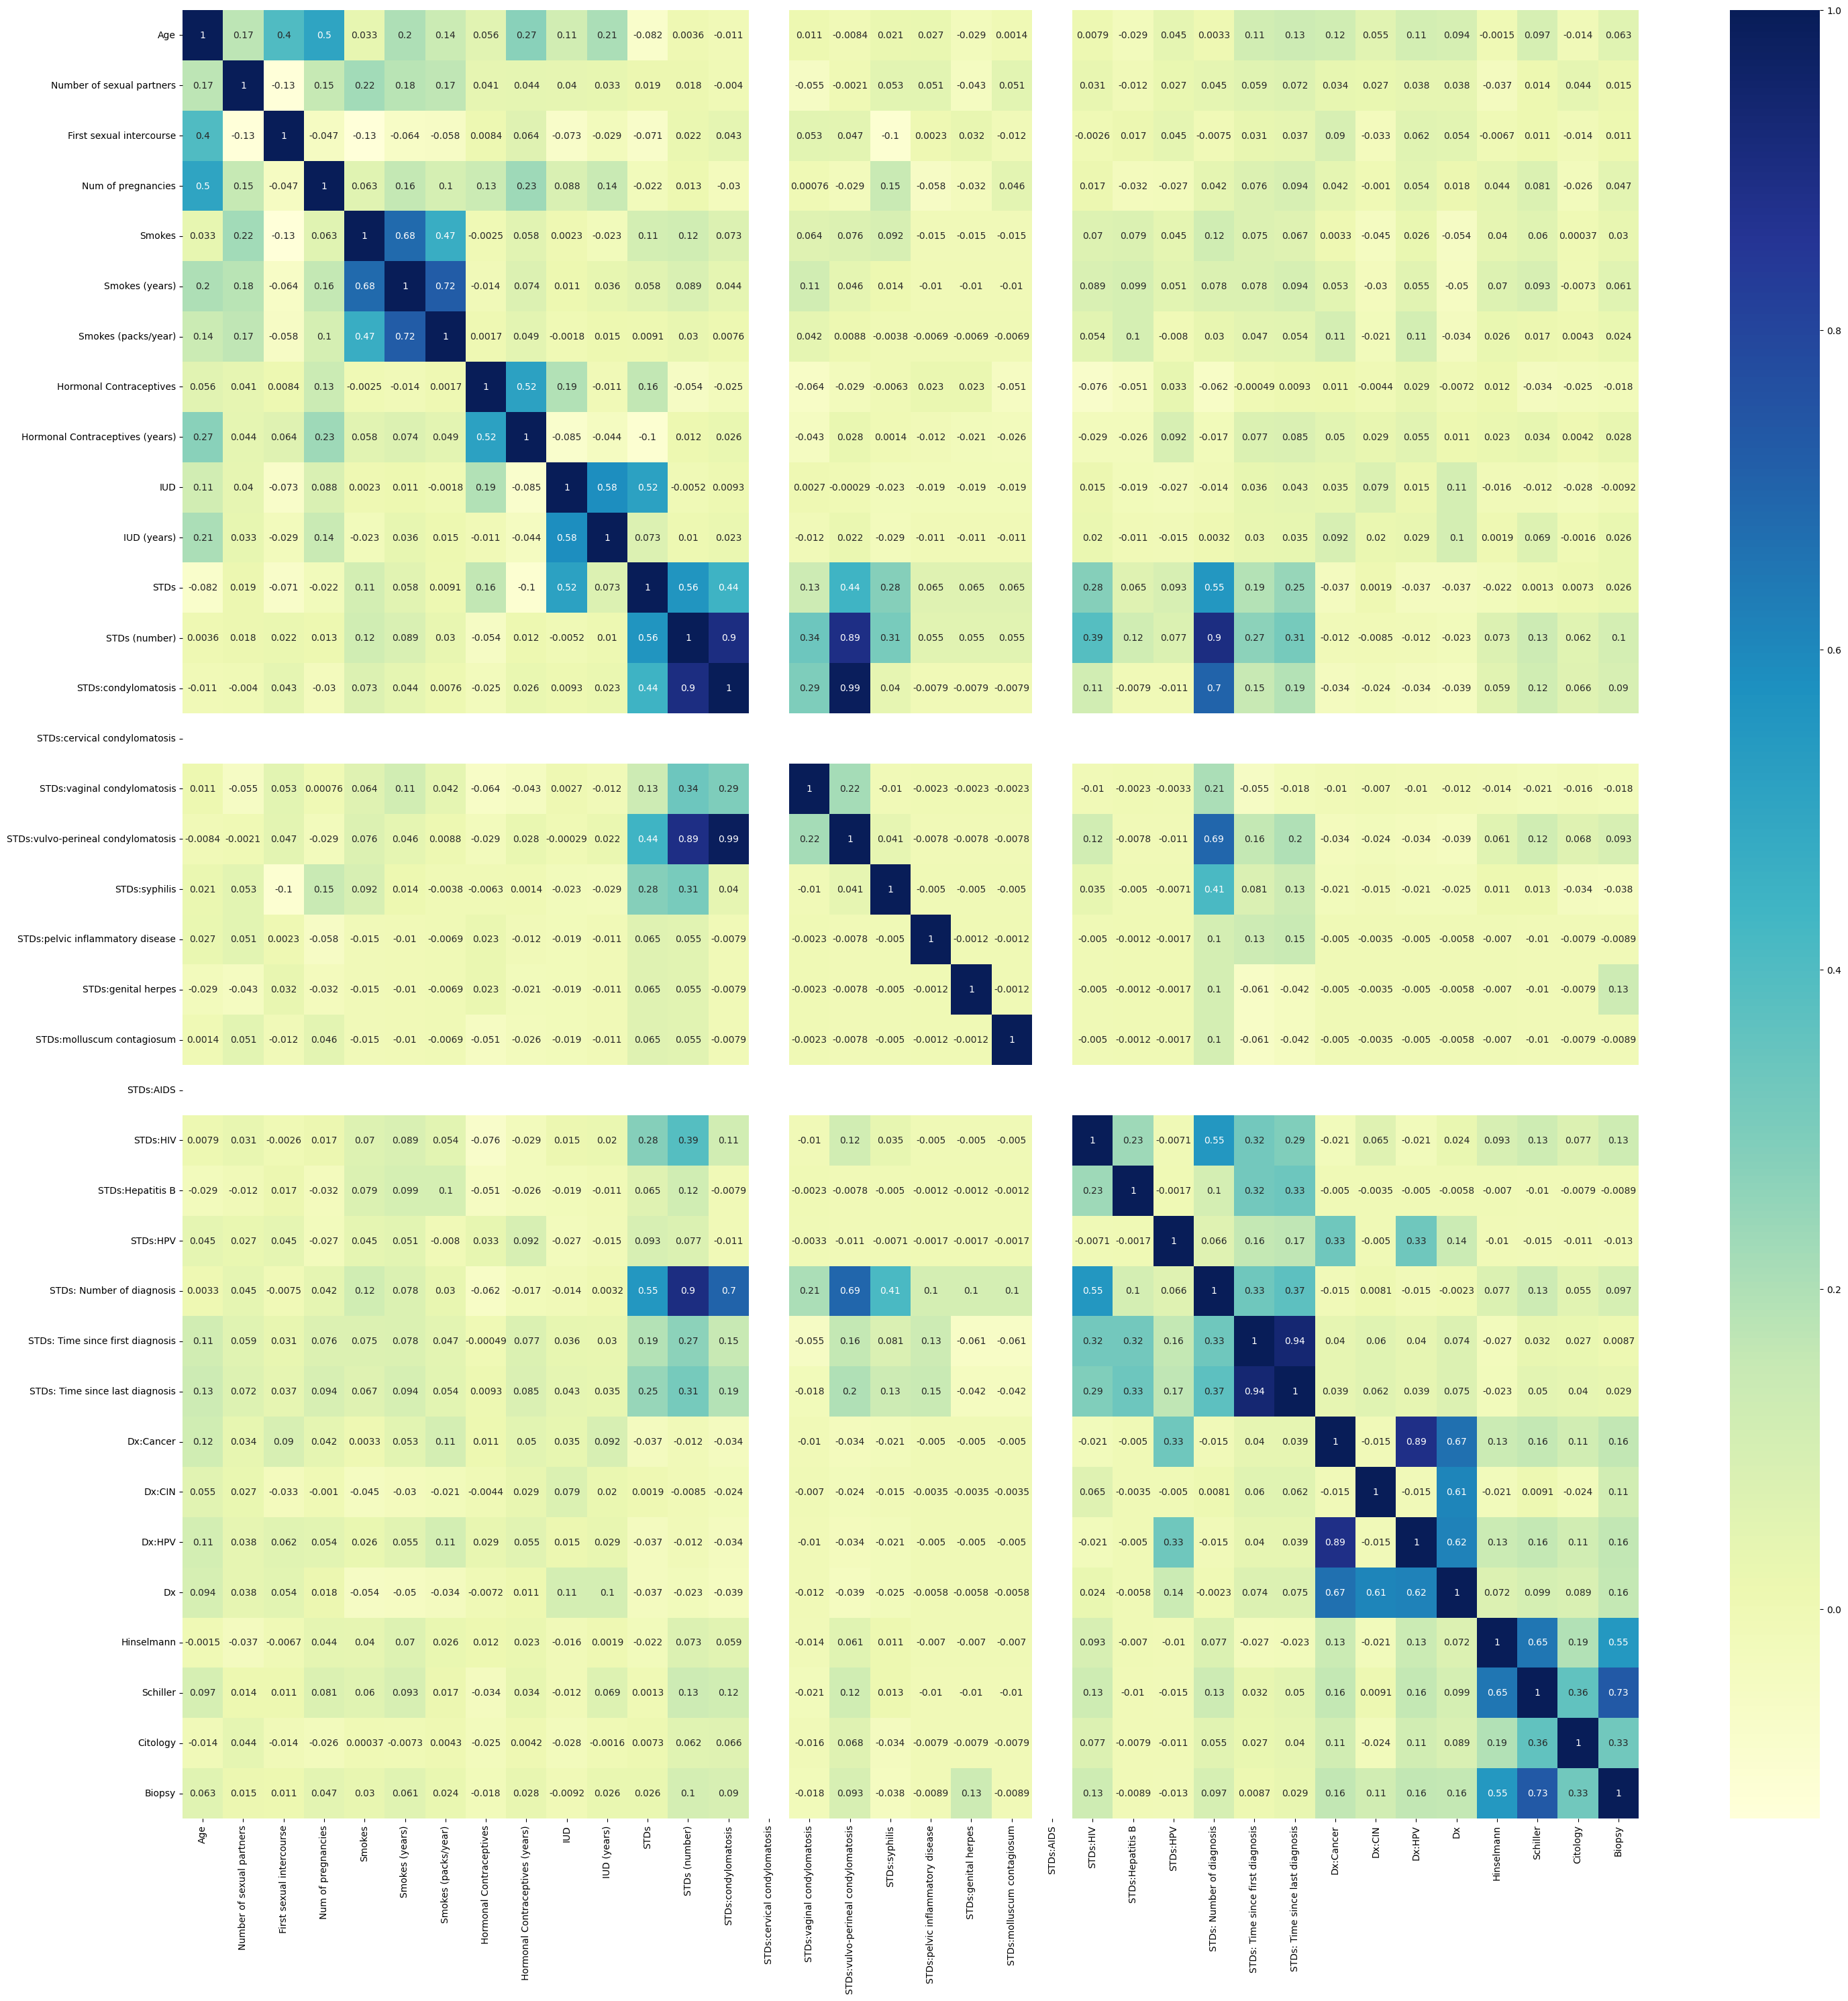

In [122]:
plt.figure(figsize=(35, 35))
dataplot = sns.heatmap(df_normalized.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [123]:
# Removing columns 'STDs:cervical condylomatosis' and 'STDs:AIDS' as all values are 0
df_extracted = df_normalized.drop(['STDs:cervical condylomatosis', 'STDs:AIDS'], axis=1)
df_extracted.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,0.369842,0.394938,0.528895,0.372572,0.158508,0.032466,0.012062,0.686480,0.285271,0.233100,0.030577,0.214452,0.038753,0.051282,0.004662,0.050117,0.020979,0.001166,0.001166,0.001166,0.020979,0.001166,0.002331,0.029138,0.151293,0.106338,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,0.213665,0.312560,0.193174,0.219351,0.365430,0.109747,0.059739,0.464194,0.374119,0.423052,0.095435,0.410681,0.132404,0.220701,0.068159,0.218313,0.143398,0.034139,0.034139,0.034139,0.143398,0.034139,0.048252,0.100848,0.085007,0.086616,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.189189,0.285714,0.375000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.324324,0.285714,0.541667,0.333333,0.000000,0.000000,0.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.513514,0.571429,0.625000,0.500000,0.000000,0.000000,0.000000,1.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Splitting Data
Test-train split

In [124]:
X = df_extracted.iloc[:, 0:30].values
y1 = df_extracted.iloc[:, 30].values # Hinselmann
y2 = df_extracted.iloc[:, 31].values # Schiller
y3 = df_extracted.iloc[:, 32].values # Citology
y4 = df_extracted.iloc[:, 33].values # Biopsy

In [125]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size = 0.25)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size = 0.25)
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y3, test_size = 0.25)
X4_train, X4_test, y4_train, y4_test = train_test_split(X, y4, test_size = 0.25)

# DATA BALANCING
Using SMOTE

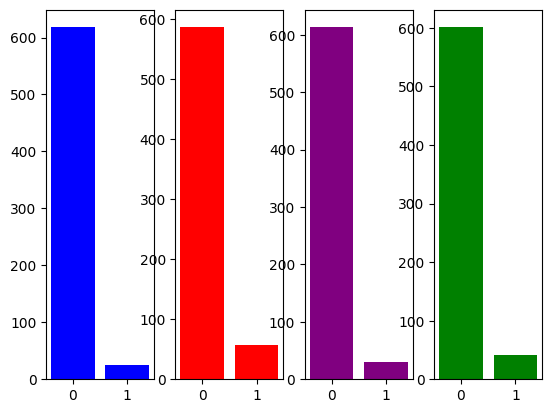

In [126]:
fig, axes = plt.subplots(nrows=1, ncols=4)
data1 = {'0':(y1_train==0).sum(),'1':(y1_train==1).sum()}
data2 = {'0':(y2_train==0).sum(),'1':(y2_train==1).sum()}
data3 = {'0':(y3_train==0).sum(),'1':(y3_train==1).sum()}
data4 = {'0':(y4_train==0).sum(),'1':(y4_train==1).sum()}
axes[0].bar(list(data1.keys()), list(data1.values()), color='blue') # Hinselmann
axes[1].bar(list(data2.keys()), list(data2.values()), color='red') # Schiller
axes[2].bar(list(data3.keys()), list(data3.values()), color='purple') # Citology
axes[3].bar(list(data4.keys()), list(data4.values()), color='green') # Biopsy
plt.show()

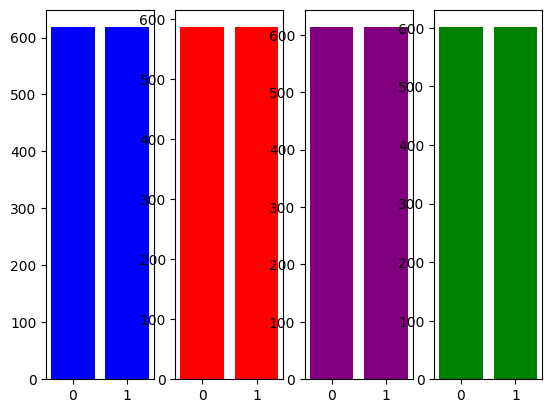

In [127]:
X1_train, y1_train = SMOTE(random_state=42).fit_resample(X1_train, y1_train)
X2_train, y2_train = SMOTE(random_state=42).fit_resample(X2_train, y2_train)
X3_train, y3_train = SMOTE(random_state=42).fit_resample(X3_train, y3_train)
X4_train, y4_train = SMOTE(random_state=42).fit_resample(X4_train, y4_train)

fig, axes = plt.subplots(nrows=1, ncols=4)
data1 = {'0':(y1_train==0).sum(),'1':(y1_train==1).sum()}
data2 = {'0':(y2_train==0).sum(),'1':(y2_train==1).sum()}
data3 = {'0':(y3_train==0).sum(),'1':(y3_train==1).sum()}
data4 = {'0':(y4_train==0).sum(),'1':(y4_train==1).sum()}
axes[0].bar(list(data1.keys()), list(data1.values()), color='blue')
axes[1].bar(list(data2.keys()), list(data2.values()), color='red')
axes[2].bar(list(data3.keys()), list(data3.values()), color='purple')
axes[3].bar(list(data4.keys()), list(data4.values()), color='green')
plt.show()

# Feature Extraction
Using PCA to extract the principal components.

In [128]:
from sklearn.decomposition import PCA

def pca_extraction(X_train,X_test):
  pca = PCA(n_components = 0.99)
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)
  
  explained_variance = pca.explained_variance_ratio_
  return X_train,X_test

X1_train,X1_test = pca_extraction(X1_train,X1_test)
X2_train,X2_test = pca_extraction(X2_train,X2_test)
X3_train,X3_test = pca_extraction(X3_train,X3_test)
X4_train,X4_test = pca_extraction(X4_train,X4_test)

In [129]:
X2_train.shape

# reduced number of features from 30 to 17

(1172, 17)

# CLASSIFIER

# KNN:
After using different values of *k* (number of neighbours), found k=2 as optimal.

In [130]:
def knn_classification(X_train, X_test, y_train, y_test):
  knn = KNeighborsClassifier(n_neighbors=2)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  scores = precision_recall_fscore_support(y1_test, y_pred, average="weighted")
  precision = scores[0]
  recall = scores[1]
  # f1score = scores[2]

  # print("Accuracy:", accuracy)
  # print("Precision:", precision)
  # print("Recall:", recall)
  # print("***********************************************")

  return accuracy, precision, recall, y_pred

# SVM:

After using different values of *C* (regularizer weight), found C=10.0 as optimal.

In [131]:
def svm_classification(X_train, X_test, y_train, y_test):
  svc=SVC(C=10.0) 
  svc.fit(X_train,y_train)
  y_pred=svc.predict(X_test)
  
  accuracy = accuracy_score(y_test, y_pred)
  scores = precision_recall_fscore_support(y1_test, y_pred, average="weighted")
  precision = scores[0]
  recall = scores[1]
  # f1score = scores[2]

  # print("Accuracy:", accuracy)
  # print("Precision:", precision)
  # print("Recall:", recall)
  # print("***********************************************")

  return accuracy, precision, recall, y_pred

In [132]:
knn_arr = [[knn_classification(X1_train, X1_test, y1_train, y1_test)[0], knn_classification(X2_train, X2_test, y2_train, y2_test)[0], knn_classification(X3_train, X3_test, y3_train, y3_test)[0], knn_classification(X4_train, X4_test, y4_train, y4_test)[0]],
       [knn_classification(X1_train, X1_test, y1_train, y1_test)[1], knn_classification(X2_train, X2_test, y2_train, y2_test)[1], knn_classification(X3_train, X3_test, y3_train, y3_test)[1], knn_classification(X4_train, X4_test, y4_train, y4_test)[1]],
       [knn_classification(X1_train, X1_test, y1_train, y1_test)[2], knn_classification(X2_train, X2_test, y2_train, y2_test)[2], knn_classification(X3_train, X3_test, y3_train, y3_test)[2], knn_classification(X4_train, X4_test, y4_train, y4_test)[2]]]

svm_arr = [[svm_classification(X1_train, X1_test, y1_train, y1_test)[0], svm_classification(X2_train, X2_test, y2_train, y2_test)[0], svm_classification(X3_train, X3_test, y3_train, y3_test)[0], svm_classification(X4_train, X4_test, y4_train, y4_test)[0]],
       [svm_classification(X1_train, X1_test, y1_train, y1_test)[1], svm_classification(X2_train, X2_test, y2_train, y2_test)[1], svm_classification(X3_train, X3_test, y3_train, y3_test)[1], svm_classification(X4_train, X4_test, y4_train, y4_test)[1]],
       [svm_classification(X1_train, X1_test, y1_train, y1_test)[2], svm_classification(X2_train, X2_test, y2_train, y2_test)[2], svm_classification(X3_train, X3_test, y3_train, y3_test)[2], svm_classification(X4_train, X4_test, y4_train, y4_test)[2]]]

# Table showing evaluation metrics for each classifier: Accuracy, Precision and Recall.

Text(0.5, 1.0, 'SVM Classification')

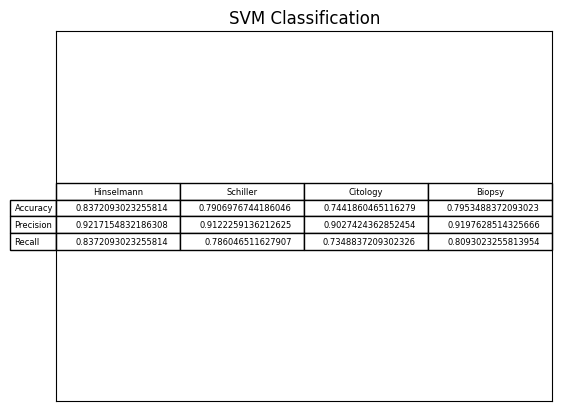

In [133]:
fig, ax = plt.subplots()

# Hide axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)

collabel=("Hinselmann", "Schiller", "Citology", "Biopsy")
rowlabel=("Accuracy","Precision","Recall")
ax.table(cellText=svm_arr,colLabels=collabel,rowLabels=rowlabel,loc='center', rowLoc='left', bbox=None, edges='closed')
plt.title("SVM Classification")

Text(0.5, 1.0, 'KNN Classification')

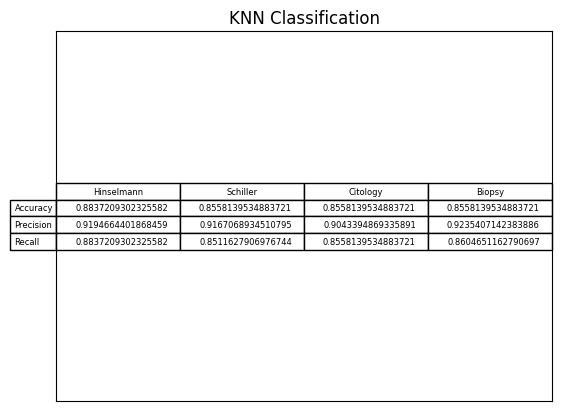

In [134]:
fig, ax = plt.subplots()

# Hide axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)

collabel=("Hinselmann", "Schiller", "Citology", "Biopsy")
rowlabel=("Accuracy","Precision","Recall")
ax.table(cellText=knn_arr,colLabels=collabel,rowLabels=rowlabel,loc='center', rowLoc='left', bbox=None, edges='closed')
plt.title("KNN Classification")

# Confusion Matrix for each target variable for both classifiers:

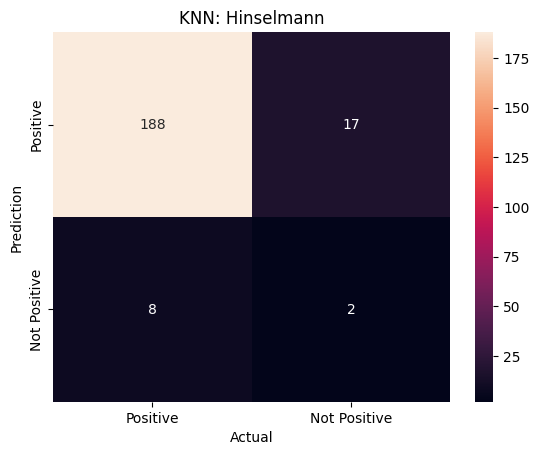

In [135]:
knn_cm1 = confusion_matrix(y1_test, knn_classification(X1_train, X1_test, y1_train, y1_test)[3])
sns.heatmap(knn_cm1,annot=True,fmt='g',xticklabels=['Positive','Not Positive'],yticklabels=['Positive','Not Positive'])
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('KNN: Hinselmann')
plt.show()

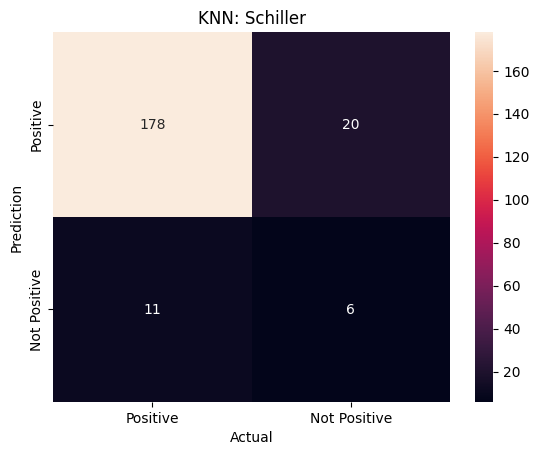

In [136]:
knn_cm2 = confusion_matrix(y2_test, knn_classification(X2_train, X2_test, y2_train, y2_test)[3])
sns.heatmap(knn_cm2,annot=True,fmt='g',xticklabels=['Positive','Not Positive'],yticklabels=['Positive','Not Positive'])
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('KNN: Schiller')
plt.show()

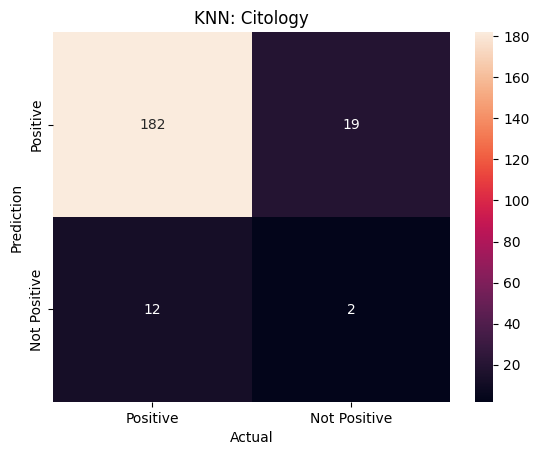

In [137]:
knn_cm3 = confusion_matrix(y3_test, knn_classification(X3_train, X3_test, y3_train, y3_test)[3])
sns.heatmap(knn_cm3,annot=True,fmt='g',xticklabels=['Positive','Not Positive'],yticklabels=['Positive','Not Positive'])
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('KNN: Citology')
plt.show()

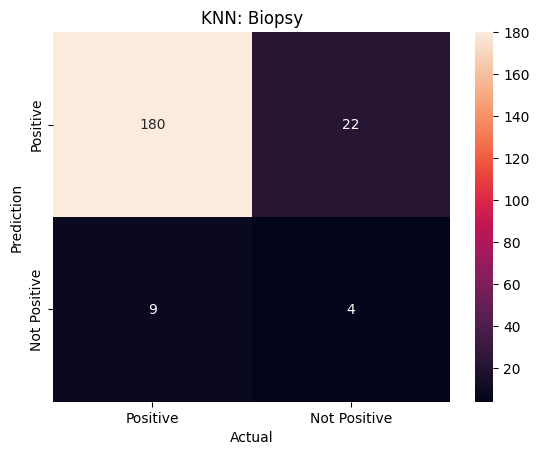

In [138]:
knn_cm4 = confusion_matrix(y4_test, knn_classification(X4_train, X4_test, y4_train, y4_test)[3])
sns.heatmap(knn_cm4,annot=True,fmt='g',xticklabels=['Positive','Not Positive'],yticklabels=['Positive','Not Positive'])
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('KNN: Biopsy')
plt.show()

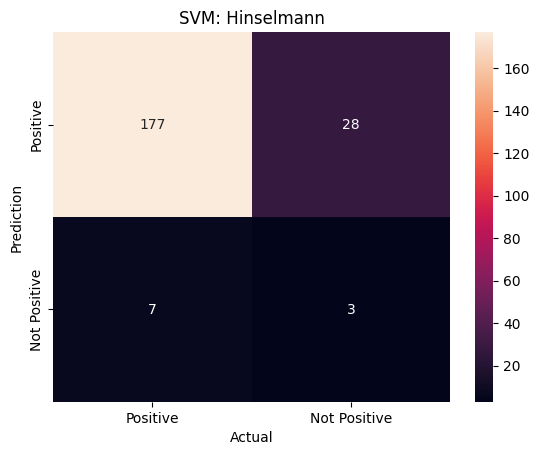

In [139]:
svm_cm1 = confusion_matrix(y1_test, svm_classification(X1_train, X1_test, y1_train, y1_test)[3])
sns.heatmap(svm_cm1,annot=True,fmt='g',xticklabels=['Positive','Not Positive'],yticklabels=['Positive','Not Positive'])
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('SVM: Hinselmann')
plt.show()

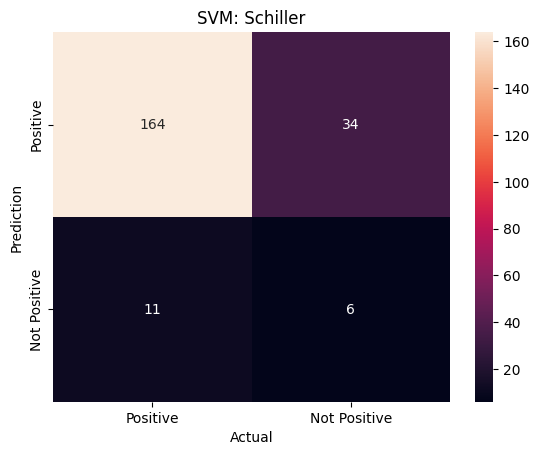

In [140]:
svm_cm2 = confusion_matrix(y2_test, svm_classification(X2_train, X2_test, y2_train, y2_test)[3])
sns.heatmap(svm_cm2,annot=True,fmt='g',xticklabels=['Positive','Not Positive'],yticklabels=['Positive','Not Positive'])
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('SVM: Schiller')
plt.show()

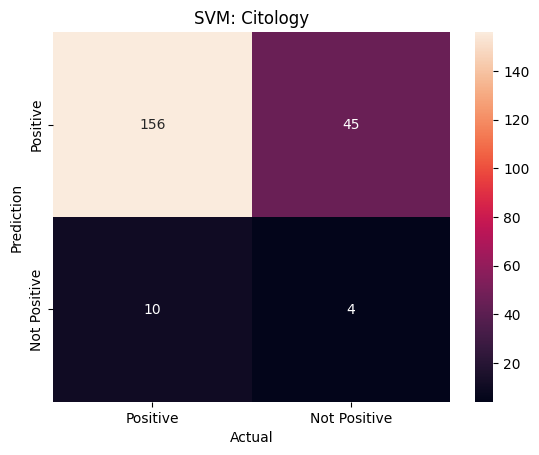

In [141]:
svm_cm3 = confusion_matrix(y3_test, svm_classification(X3_train, X3_test, y3_train, y3_test)[3])
sns.heatmap(svm_cm3,annot=True,fmt='g',xticklabels=['Positive','Not Positive'],yticklabels=['Positive','Not Positive'])
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('SVM: Citology')
plt.show()

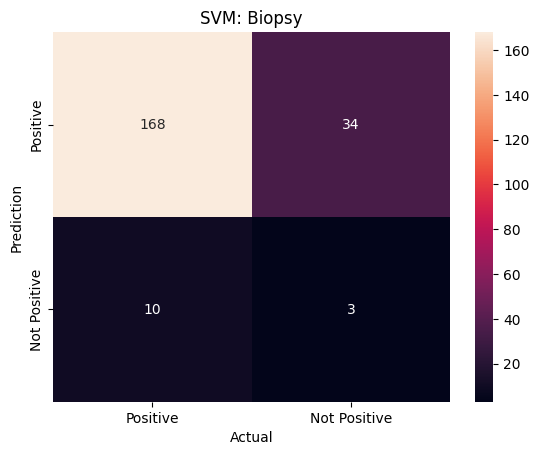

In [142]:
svm_cm4 = confusion_matrix(y4_test, svm_classification(X4_train, X4_test, y4_train, y4_test)[3])
sns.heatmap(svm_cm4,annot=True,fmt='g',xticklabels=['Positive','Not Positive'],yticklabels=['Positive','Not Positive'])
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('SVM: Biopsy')
plt.show()